In [40]:
import numpy as np
import pandas as pd
from copy import deepcopy
k=3
import random as rd
import matplotlib.pyplot as plt

In [41]:
x = pd.read_csv("kmeans.csv")
x

,X1,X2
0,5.9,3.2
1,4.6,2.9
2,6.2,2.8
3,4.7,3.2
4,5.5,4.2
5,5.0,3.0
6,4.9,3.1
7,6.7,3.1
8,5.1,3.8
9,6.0,3.0


In [42]:
x = x[["X1","X2"]]

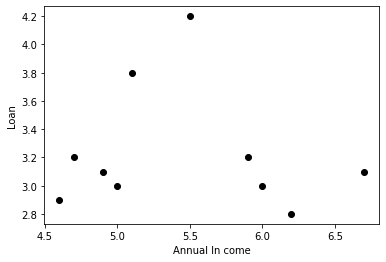

In [43]:
plt.scatter(x["X1"],x["X2"],c="black")
plt.xlabel("Annual In come")
plt.ylabel("Loan")
plt.show()

In [44]:
x1 = x["X1"].values
x2 = x["X2"].values
x = np.array(list(zip(x1,x2)))

In [45]:
c_x = [6.2,6.6,6.5]
c_y = [3.2,3.7,3.0]

In [46]:
centroid=np.array(list(zip(c_x,c_y)))

In [47]:
print(centroid.shape)

(3, 2)


In [48]:
centroid_old = np.zeros(centroid.shape)
print(centroid_old)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [49]:
clusters = np.zeros(len(x))
clusters

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [50]:
def eucledian(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)
error = eucledian(centroid,centroid_old,None)
error

12.53714481052205

In [51]:
iter=0
while error!=0:
    iter=iter+1
    for i in range(len(x)):
        distances = eucledian(x[i],centroid)
        cluster = np.argmin(distances)
        clusters[i]=cluster
    centroid_old=deepcopy(centroid)
    print(centroid_old)
    for p in range(k):
        points = [x[j] for j in range(len(x)) if clusters[j]==p]
        centroid[p] = np.mean(points,axis=0)
    print("New centroid after ", iter,"Iteration\n",centroid)
    error=eucledian(centroid,centroid_old,None)
    print("error----",error)
    print("Data points belong to which cluster")
    print(clusters)
    print("*******************************")

[[6.2 3.2]
 [6.6 3.7]
 [6.5 3. ]]
New centroid after  1 Iteration
 [[5.17142857 3.17142857]
 [5.5        4.2       ]
 [6.45       2.95      ]]
error---- 1.588639515498743
Data points belong to which cluster
[0. 0. 2. 0. 1. 0. 0. 2. 0. 0.]
*******************************
[[5.17142857 3.17142857]
 [5.5        4.2       ]
 [6.45       2.95      ]]
New centroid after  2 Iteration
 [[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
error---- 0.5484788798419251
Data points belong to which cluster
[2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]
*******************************
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
New centroid after  3 Iteration
 [[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
error---- 0.0
Data points belong to which cluster
[2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]
*******************************
